<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/DAV%20-%20Propability%20%26%20Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, binom, geom
from scipy.stats import ttest_1samp, ttest_ind

from scipy.stats import chisquare,chi2,chi2_contingency

from scipy.stats import f_oneway,kruskal,shapiro
from statsmodels.graphics.gofplots import qqplot

# **DAV - Propability & Statistics**

In [ ]:
def normal(mu, sigma,obs):
  # Sigma is the Population standard Deviation
  # mu is Pupulation or Sample Mean
  # obs is value for which propability to be calculated
  z = (obs- mu)/sigma
  prob_less = norm.cdf(z)
  prob_more = 1 - prob_less
  return prob_less, prob_more,z

In [ ]:
normal(80,10, 90)

(0.8413447460685429, 0.15865525393145707, 1.0)

In [ ]:
def clt_fun(mu, sigma, n, obs):
  # Sigma is the Population standard Deviation
  # mu is Pupulation or Sample Mean
  # n is sample Size
  # obs is value for which propability to be calculated
  std_error = sigma / np.sqrt(n)
  z = (obs- mu)/std_error
  prob_less = norm.cdf(z)
  prob_more = 1 - prob_less
  return prob_less, prob_more

In [ ]:
clt_fun(80, 15, 50, 75)

(0.009211062727049501, 0.9907889372729505)

In [ ]:
def confiinterval(mu, sigma, n, perct):
  # Sigma is the Population standard Deviation
  # mu is Population or Sample Mean
  # n is sample Size
  # perct is confidence percentatge required for interval calculation
  std_error = sigma / np.sqrt(n)
  x1 = mu + (std_error * norm.ppf((100-perct)/200))
  x2 = mu + (std_error * norm.ppf(1 - ((100-perct)/200)))
  return x1,x2

In [ ]:
confiinterval(80, 10, 30, 99)

(75.29720062054481, 84.70279937945519)

In [ ]:
# TO calculate Z value from  Percentile ( Input Percentile : 0 ~ 1)( output Z: -inf to +inf)
norm.ppf(0.9)

1.2815515655446004

In [ ]:
# TO calculate Percentile from Z value ( Input Z : -inf to +inf)(output Percentile: 0 ~ 1)
norm.cdf(-1)

0.15865525393145707

In [ ]:
# Binomial Distribution Propability for "s" sucesses in "n" trial with success propability of "p"
n = 10 # No of Trial
p = 0.5 # Propability of Success
s = 5 #No of Success in N trials
binom.pmf(s, n, p)

0.24609375000000003

In [ ]:
# Binomial Distribution Propability for all possible success outcomes from 0 to n Sucesses
n = 10 # No of Trial
p = 0.5 # Propability of Succes
binom.pmf(np.arange(n+1), n, p)

array([0.00097656, 0.00976563, 0.04394531, 0.1171875 , 0.20507812,
       0.24609375, 0.20507812, 0.1171875 , 0.04394531, 0.00976563,
       0.00097656])

<Axes: >

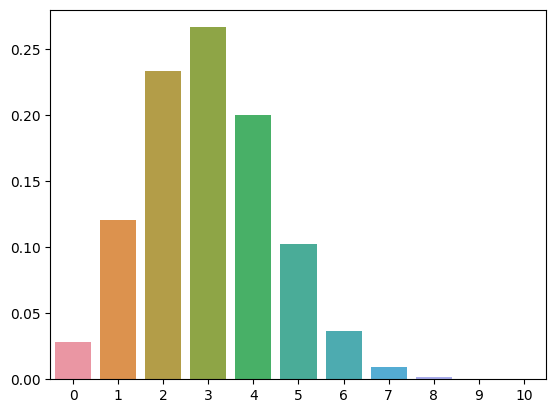

In [ ]:
# Binomial Distribution Propability plot
n = 10 # No of Trial
p = 0.3 # Propability of Succes
sns.barplot(x= np.arange(n+1), y = [binom.pmf(i,n,p) for i in range(n+1)])

In [ ]:
# Binomial Distribution Propability for  sucesses less than "s" in "n" trial with success propability of "p":Cummulative Distribution
n = 10 # No of Trial
p = 0.5 # Propability of Succes
s = 7 # No of Success less than "s"
binom.cdf(s,n,p)

0.9453125

<Axes: >

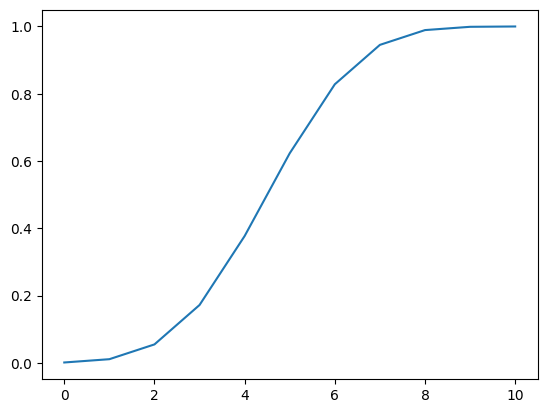

In [ ]:
# Cummulative distribution for Binomial Distribution
n = 10 # No of Trial
p = 0.5 # Propability of Succes
sns.lineplot(x= np.arange(n+1), y = [binom.cdf(i,n,p) for i in range(n+1)])

In [ ]:
# Geometric Distribution Propability
n = 0 # No of Trial for 1st Succes
p = 0.5 # Propability of Succes
geom.pmf(n, p)

0.0

<Axes: >

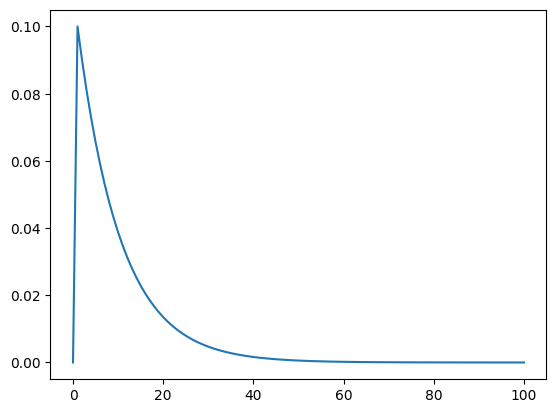

In [ ]:
# Geometric Distribution Propability curve [Propability of Succes at given no of trials]
n = 100 # No of Trial
p = 0.1 # Propability of Succes
sns.lineplot(x= np.arange(0,n+1), y = [geom.pmf(i,p) for i in range(0,n+1)])

In [ ]:
# Geometric Distribution Propability for sucesses  by "n"th trial  with success propability of "p":Cummulative Distribution
n = 3 #  sucesse  by "n"th
p = 0.1 # Propability of Succes
geom.cdf(n, p)

0.271

<Axes: >

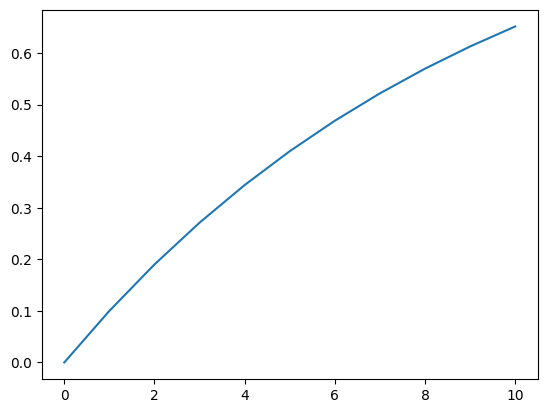

In [ ]:
# Cummulative distribution for Geomtric Distribution
n = 10 # No of Trial
p = 0.1 # Propability of Success
sns.lineplot(x= np.arange(0,n+1), y = [geom.cdf(i,p) for i in range(0,n+1)])

In [ ]:
geom.ppf(0.7,0.5)

2.0

# **DAV - Fundamentals**

## Z-Test

In [ ]:
# H0: mu = 500
# Ha : mu >500

z_stat = (530-500)/(125/np.sqrt(70))
p_value = 1-norm.cdf(z_stat)
print(p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject H0")
else:
    print("Do not reject H0")

In [ ]:
z = norm.ppf(0.95)
x = 500 + z * 125/np.sqrt(70)
x

In [ ]:
1-norm.cdf((524.574701413748-500)/(125/np.sqrt(70)))

## T-Test

1-Sample T-Test

In [ ]:
# Improve IQ with a pill
#Population IQ average = 100
#One researcher claims that his pill will improve IQ

iq_scores = [110, 105, 98, 102, 99, 104, 115, 95]
np.mean(iq_scores)

103.5

In [ ]:
alpha = 0.01
#H0 : mu = 100 (pill does have any effect)
#Ha : mu> 100 (pill has a good effect)

t_stat, p_value = ttest_1samp(iq_scores, 100,alternative = "greater")
print(p_value)
print(t_stat)
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")
    print("Pill has no effect")

0.08774972467925055
1.5071573172061195
Fail to reject H0
Pill has no effect


2-Sample or Independent T-Test

In [ ]:
#IQ across 2 schools
df_iq = pd.read_csv("iq_two_schools.csv")
df_iq.head()

,School,iq
0,school_1,91
1,school_1,95
2,school_1,110
3,school_1,112
4,school_1,115


In [ ]:
df_iq.groupby("School")["iq"].mean()

School
school_1    101.153846
school_2    109.416667
Name: iq, dtype: float64

In [ ]:
iq_1 = df_iq[df_iq["School"]=="school_1"]["iq"]
iq_2 = df_iq[df_iq["School"]=="school_2"]["iq"]

In [ ]:
# H0: mu1 = mu2 #H0 : two schools are essentially the same
#Ha: mu1 != mu2  #Default - two sided
t_stat, p_value = ttest_ind(iq_1, iq_2)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

0.02004552710936217
Reject H0


In [ ]:
#H0: mu1 = mu2
#Ha : mu1 < mu2

t_stat, p_value = ttest_ind(iq_1, iq_2, alternative="less")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

0.010022763554681085
Reject H0


In [ ]:
# Ha: mu1 > mu2

t_stat, p_value = ttest_ind(iq_1, iq_2, alternative="greater")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

0.9899772364453189
Fail to reject H0


## Chisquared Test

In [2]:
#Coin toss

#H0 : Coin is fair
#Ha : Coin is biased
#Chisquared(Actual Values, Expected Values as per Ho)
alpha = 0.05
chi_stat, p_value = chisquare(
    [28, 22],
    [25, 25],
)
print(p_value)
print(chi_stat)
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")
    print("Coin is fair")

0.3961439091520741
0.72
Fail to reject H0
Coin is fair


In [5]:
#chi-stat manually doing
(28 - 25)**2/25 + (22 - 25)**2 /25

0.72

In [6]:
#p-value manually doing
# 1 - chi2.cdf(chi-stat, df=1)
1 - chi2.cdf(0.72, df=1)

0.3961439091520741

In [7]:
#finding 95% Critical Chistat Value
chi2.ppf(0.95, df=1)

3.841458820694124

In [8]:
#Gender vs offline and online

# H0: Gender and preference are independent
# Ha: Preference depends on gender

observed = [
    [527, 72],
    [206, 102],
]

chi_stat, p_value, df, exp_freq = chi2_contingency(observed)
print(chi_stat)
print(p_value)
print(df)
print(exp_freq)
if p_value < 0.05:
    print("Reject H0")

57.04098674049609
4.268230756875865e-14
1
[[484.08710033 114.91289967]
 [248.91289967  59.08710033]]
Reject H0


## ANOVA

In [ ]:
from scipy.stats import f_oneway

In [ ]:
#H0 : All groups have same mean
#Ha : One or more groups have different mean

f_stats, p_value = f_oneway(income_kp281, income_kp481, income_kp781)

if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

Kruskal Wallis

In [ ]:
from scipy.stats import kruskal

In [ ]:
#H0 : All groups have same mean
#Ha : One or more groups have different mean

kruskal(income_kp281, income_kp481, income_kp781)

if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

QQplots - to get intuition if data is Normal Distribution

In [ ]:
from statsmodels.graphics.gofplots import qqplot
qqplot(height, line="s")
plt.show()

Shapiro - to statistically check if given data is Gaussian Distribution

In [ ]:
from scipy.stats import shapiro

In [ ]:
#H0 : Data is Gaussian
#Ha : Data is not Gaussian

test_stat, p_value = shapiro(height_subset)
if p_value < 0.05:
    print("Reject H0")
    print("Data is Not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

levene Test - to check if data sets have same Variance

In [ ]:
from scipy.stats import levene

In [ ]:
# H0: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(height_men, height_women)
if p_value < 0.05:
    print("Variances are not equal")
else:
    print("Fail to reject H0")
    print("Variances are equal")